In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_series(time, series, format='-'):
    plt.figure(figsize=(10, 6))
    plt.plot(time, series, format)
    plt.xlabel('time')
    plt.ylabel('value')
    plt.grid(True)

In [3]:
def trend(time, slope=0):
    return slope * time

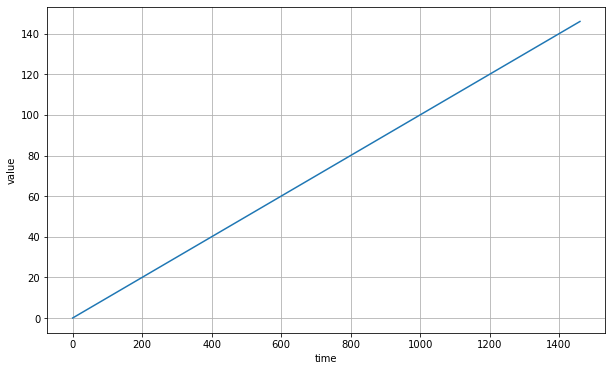

In [4]:
time = np.arange(4 * 365 + 1)
baseline = 10
series = trend(time, 0.1)
plot_series(time, series)
plt.show()

In [5]:
def seasonal_pattern(season_time):
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

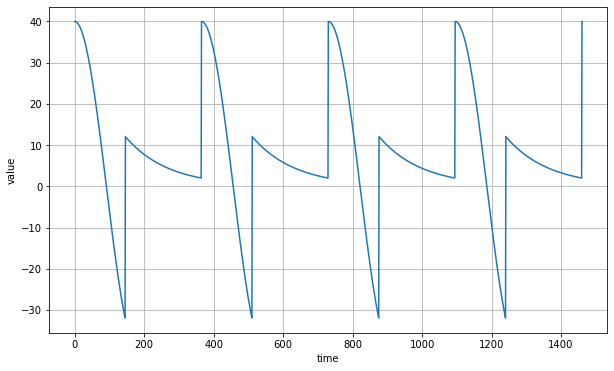

In [6]:
baseline = 10
amplitude = 40
series = seasonality(time, period=365, amplitude=amplitude)
plot_series(time, series)
plt.show()

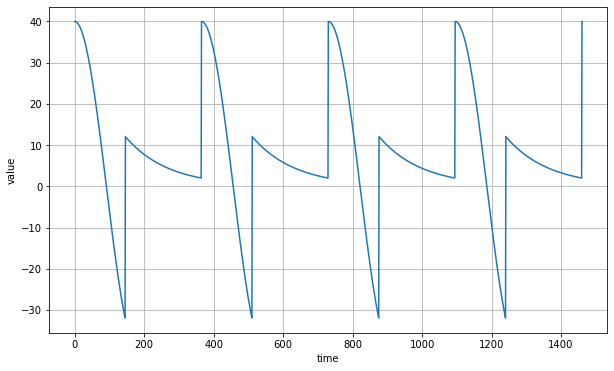

In [7]:
slope = 0.05
series - baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
plot_series(time, series)
plt.show()

In [8]:
def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time), noise_level)

In [9]:
noise_level = 15
noisy_series = series + noise(time, noise_level, seed=42)
plot_series(time, noisy_series)
plt.show()

ValueError: operands could not be broadcast together with shapes (1461,) (1461,15) 